In [62]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [32]:
rfm = pd.read_csv('data/result.csv')

In [3]:
rfm.head(5)

,customer_id,article_id,price,t_dat,age,count,total,t_dat_R,count_F,total_M,Class
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,176209023.0,0.035576,8467200.0,49.0,1,0.035576,2,1,8,2
1,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,568601006.0,0.050831,21340800.0,49.0,2,0.101661,4,9,10,1
2,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,568601043.0,0.050831,61862400.0,49.0,1,0.050831,10,1,9,1
3,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,607642008.0,0.012695,26611200.0,49.0,1,0.012695,5,1,2,5
4,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,625548001.0,0.044051,8467200.0,49.0,1,0.044051,2,1,9,1


In [36]:
r = rfm[{'t_dat_R', 'count_F', 'total_M'}]
r.head()

/var/folders/0q/18zhdplj2kn8gr698kfrr_yw0000gn/T/ipykernel_82458/3913948259.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  r = rfm[{'t_dat_R', 'count_F', 'total_M'}]


,count_F,total_M,t_dat_R
0,1,8,2
1,9,10,4
2,1,9,10
3,1,2,5
4,1,9,2


In [56]:
list = ['t_dat_R', 'count_F', 'total_M']

for c in list:
  t = rfm[c]
  t = t.values.reshape(-1,1)
  scaler = MinMaxScaler()
  df_minmax = scaler.fit_transform(t)
  pd.DataFrame(df_minmax, columns = [c])
  rfm[c] = df_minmax
rfm.head()

,customer_id,article_id,price,t_dat,age,count,total,t_dat_R,count_F,total_M,Class
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,176209023.0,0.035576,8467200.0,49.0,1,0.035576,0.111111,1,8,2
1,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,568601006.0,0.050831,21340800.0,49.0,2,0.101661,0.333333,9,10,1
2,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,568601043.0,0.050831,61862400.0,49.0,1,0.050831,1.000000,1,9,1
3,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,607642008.0,0.012695,26611200.0,49.0,1,0.012695,0.444444,1,2,5
4,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,625548001.0,0.044051,8467200.0,49.0,1,0.044051,0.111111,1,9,1


In [57]:
t = rfm['count_F']
t = t.values.reshape(-1,1)
scaler = MinMaxScaler()
df_minmax = scaler.fit_transform(t)
pd.DataFrame(df_minmax, columns = ['t'])
rfm['count_F'] = df_minmax

In [58]:
t = rfm['total_M']
t = t.values.reshape(-1,1)
scaler = MinMaxScaler()
df_minmax = scaler.fit_transform(t)
pd.DataFrame(df_minmax, columns = ['t'])
rfm['total_M'] = df_minmax

In [59]:
rfm.head()

,customer_id,article_id,price,t_dat,age,count,total,t_dat_R,count_F,total_M,Class
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,176209023.0,0.035576,8467200.0,49.0,1,0.035576,0.111111,0.000000,0.777778,2
1,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,568601006.0,0.050831,21340800.0,49.0,2,0.101661,0.333333,0.888889,1.000000,1
2,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,568601043.0,0.050831,61862400.0,49.0,1,0.050831,1.000000,0.000000,0.888889,1
3,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,607642008.0,0.012695,26611200.0,49.0,1,0.012695,0.444444,0.000000,0.111111,5
4,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,625548001.0,0.044051,8467200.0,49.0,1,0.044051,0.111111,0.000000,0.888889,1


In [65]:
df = rfm[{'t_dat_R', 'count_F', 'total_M'}]
distortions = []
K = range(1,10)
for k in tqdm(K):
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

/var/folders/0q/18zhdplj2kn8gr698kfrr_yw0000gn/T/ipykernel_82458/1526703795.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df = rfm[{'t_dat_R', 'count_F', 'total_M'}]
100%|██████████| 9/9 [07:05<00:00, 47.26s/it]


In [ ]:
# from yellowbrick.cluster import KElbowVisualizer

# model = KMeans()
# visualizer = KElbowVisualizer(model, k=(1,10))
# visualizer.fit(df)

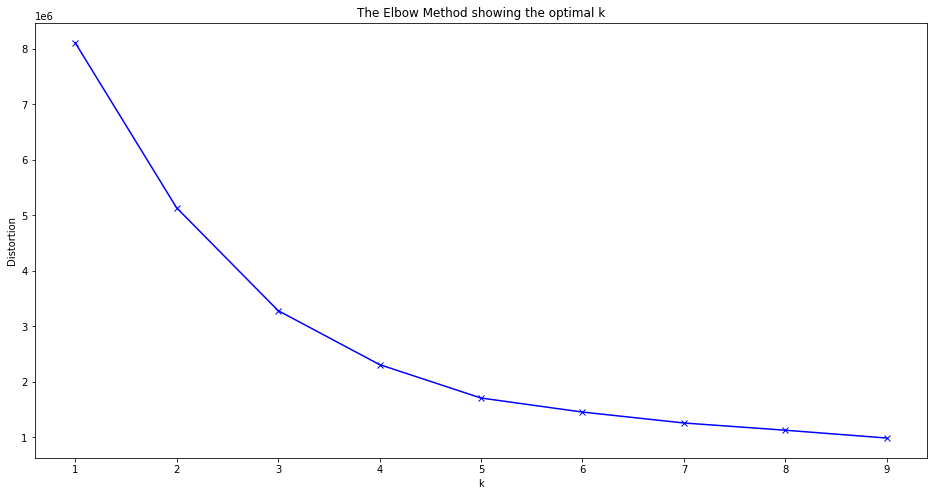

In [66]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [67]:
clust_model = KMeans(n_clusters = 5, n_init=10)

clust_model.fit(df)
centers = clust_model.cluster_centers_ # 각 군집의 중심점 
pred = clust_model.predict(df)
print(pd.DataFrame(centers))
print(pred[:10])



              0         1         2
0  9.071868e-01  0.820066  0.508197
1  5.565588e-04  0.217654  0.233348
2 -7.643330e-13  0.750688  0.758261
3  5.461457e-04  0.231506  0.791342
4 -7.566864e-13  0.750111  0.198023
[4 0 2 1 4 4 2 3 1 1]


In [68]:
clust_df = df.copy() 
clust_df['clust'] = pred 
clust_df.head()

,count_F,total_M,t_dat_R,clust
0,0.000000,0.777778,0.111111,4
1,0.888889,1.000000,0.333333,0
2,0.000000,0.888889,1.000000,2
3,0.000000,0.111111,0.444444,1
4,0.000000,0.888889,0.111111,4


In [72]:
clust_df.head(100)

,count_F,total_M,t_dat_R,clust
0,0.000000,0.777778,0.111111,4
1,0.888889,1.000000,0.333333,0
2,0.000000,0.888889,1.000000,2
3,0.000000,0.111111,0.444444,1
4,0.000000,0.888889,0.111111,4
...,...,...,...,...
95,0.000000,0.555556,0.777778,2
96,0.888889,1.000000,0.777778,0
97,0.000000,0.555556,0.333333,4
98,0.000000,0.555556,0.333333,4


In [78]:
one = clust_df[clust_df['clust'] == 0]
two = clust_df[clust_df['clust'] == 1]
three = clust_df[clust_df['clust'] == 2]
four = clust_df[clust_df['clust'] == 3]
five = clust_df[clust_df['clust'] == 4]

In [93]:
cv_r = [one['t_dat_R'].mean(), two['t_dat_R'].mean(),three['t_dat_R'].mean(),four['t_dat_R'].mean(),five['t_dat_R'].mean()]
cv_f = [one['count_F'].mean(), two['count_F'].mean(),three['count_F'].mean(),four['count_F'].mean(),five['count_F'].mean()]
cv_m = [one['total_M'].mean(), two['total_M'].mean(),three['total_M'].mean(),four['total_M'].mean(),five['total_M'].mean()]
print(cv_r, cv_f, cv_m)

[0.508196566510685, 0.2333481636027817, 0.7582610758892409, 0.7913417931923246, 0.19802291073700728] [0.9071868155024313, 0.0005565587620220751, 0.0, 0.0005461456901749425, 0.0] [0.8200662425306826, 0.2176543972543739, 0.7506879112497999, 0.23150584143404973, 0.7501110531447532]


In [94]:
cv_r = min(cv_r) / sum(cv_r)
cv_f = min(cv_f) / sum(cv_f)
cv_m = min(cv_m) / sum(cv_m)
print(cv_r, cv_f, cv_m)

0.07955377502138808 0.0 0.07857487287672035


In [95]:
w1 = cv_r / (cv_m + cv_f + cv_r)
w2 = cv_f / (cv_m + cv_f + cv_r)
w3 = cv_m / (cv_m + cv_f + cv_r)
print(w1, w2, w3)

0.503095271342921 0.0 0.49690472865707896


0.503095271342921 0.0 0.49690472865707896

In [ ]:
import seaborn as sns
plt.figure(figsize=(20, 6))
X = clust_df 
plt.subplot(131) 
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], data=df, hue=clust_model.labels_, palette='coolwarm') 
plt.scatter(centers[:,0], centers[:,1], c='black', alpha=0.8, s=150) 
plt.subplot(132) 
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,2], data=df, hue=clust_model.labels_, palette='coolwarm') 
plt.scatter(centers[:,0], centers[:,2], c='black', alpha=0.8, s=150) 
plt.subplot(133) 
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,3], data=df, hue=clust_model.labels_, palette='coolwarm') 
plt.scatter(centers[:,0], centers[:,3], c='black', alpha=0.8, s=150) 
plt.show()
